# <center>EE5731 Assignment 1: Panoramic Image Stitching
# <center>LI HAIPENG A0260034W

# <CENTER>Part 1: 2D Convolution
## 1.Write a program for the image 2D convolution. It should be able to process any grayscale input image, and operate using the following kernels:
## 2.Show the results of the convolution with each of the kernels

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2


srcImg = cv2.imread('Img/einstein.png')
srcImg = cv2.cvtColor(srcImg,cv2.COLOR_BGR2GRAY)

#def different kernel
sobel_kernel_vert = np.array([[-1,0,1],
                              [-2,0,2],
                              [-1,0,1]])

sobel_kernel_hori = np.array([[-1,-2,-1],
                              [0,0,0],
                              [1,2,1]])

guassian_kernel_3 = 1/16 * np.array([[1,2,1],
                                     [2,4,2],
                                     [1,2,1]])

guassian_kernel_5 = 1/256 * np.array([[1,4,6,4,1],
                                     [4,16,24,16,4],
                                     [6,24,36,24,6],
                                     [4,16,24,16,4],
                                     [1,4,6,4,1]])

def generate_outImg(srcImg,kernel):

    m = srcImg.shape[0]
    n = srcImg.shape[1]

    outImg = np.zeros([m-kernel.shape[0]+1, n-kernel.shape[1]+1])
    return outImg

def conv_2d(src,kernel,k_size):
    out = generate_outImg(src,kernel)
    conv(src,out,kernel,k_size)
    
    return out

def conv(src,out,kernel,k_size):
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
                value = conv_each(src[i:i+k_size[0], j:j+k_size[1]], kernel)
                out[i, j] = value

def conv_each(src_pitch,kernel):
    pixel_count = kernel.size
    pixel_sum = 0
    srcflat = src_pitch.flatten()
    kernelflat = kernel.flatten()
    
    for i in range(pixel_count):
        pixel_sum += srcflat[i]*kernelflat[i]
        
    value = pixel_sum 
#     value = value if value >0  else 0
#     value = value if value < 255 else 255
    return value

#====================================================

k_size = [3,3]

plt.figure(figsize=(20,20))
plt.subplot(511)
plt.title('einstein')
plt.imshow(srcImg,cmap="gray")
    
sobel_vImg = conv_2d(srcImg,sobel_kernel_vert,k_size)
plt.subplot(512)
plt.title('sobel_kernel_vert')
plt.imshow(sobel_vImg,cmap="gray")
print(sobel_vImg)

sobel_hImg = conv_2d(srcImg,sobel_kernel_hori,k_size)
plt.subplot(513)
plt.title('sobel_kernel_hori')
plt.imshow(sobel_hImg,cmap="gray")

guass3Img = conv_2d(srcImg,guassian_kernel_3,k_size)
plt.subplot(514)
plt.title('guassian_kernel_3')
plt.imshow(guass3Img,cmap="gray")

k_size = [5,5]
guass5Img = conv_2d(srcImg,guassian_kernel_5,k_size)
plt.subplot(515)
plt.title('guassian_kernel_5')
plt.imshow(guass5Img,cmap="gray")
plt.show()



[[-2. -3. -2. ... 11.  6. 10.]
 [-3. -3. -1. ... 12.  6.  9.]
 [-4. -1. -1. ... 12.  7.  8.]
 ...
 [-4. -4. -6. ... -3. -5. -6.]
 [-2. -1. -2. ... -5. -6. -7.]
 [ 0. -3. -5. ... -7. -5. -9.]]


haarx2 kernel is
 [[-1.  1.]]
haary2 kernel is
 [[-1.]
 [ 1.]]
haarx3 kernel is
 [[ 1. -1.  1.]]
haary3 kernel is
 [[ 1.]
 [-1.]
 [ 1.]]
haarx2y2 kernel is
 [[-1.  0.]
 [ 1. -1.]]


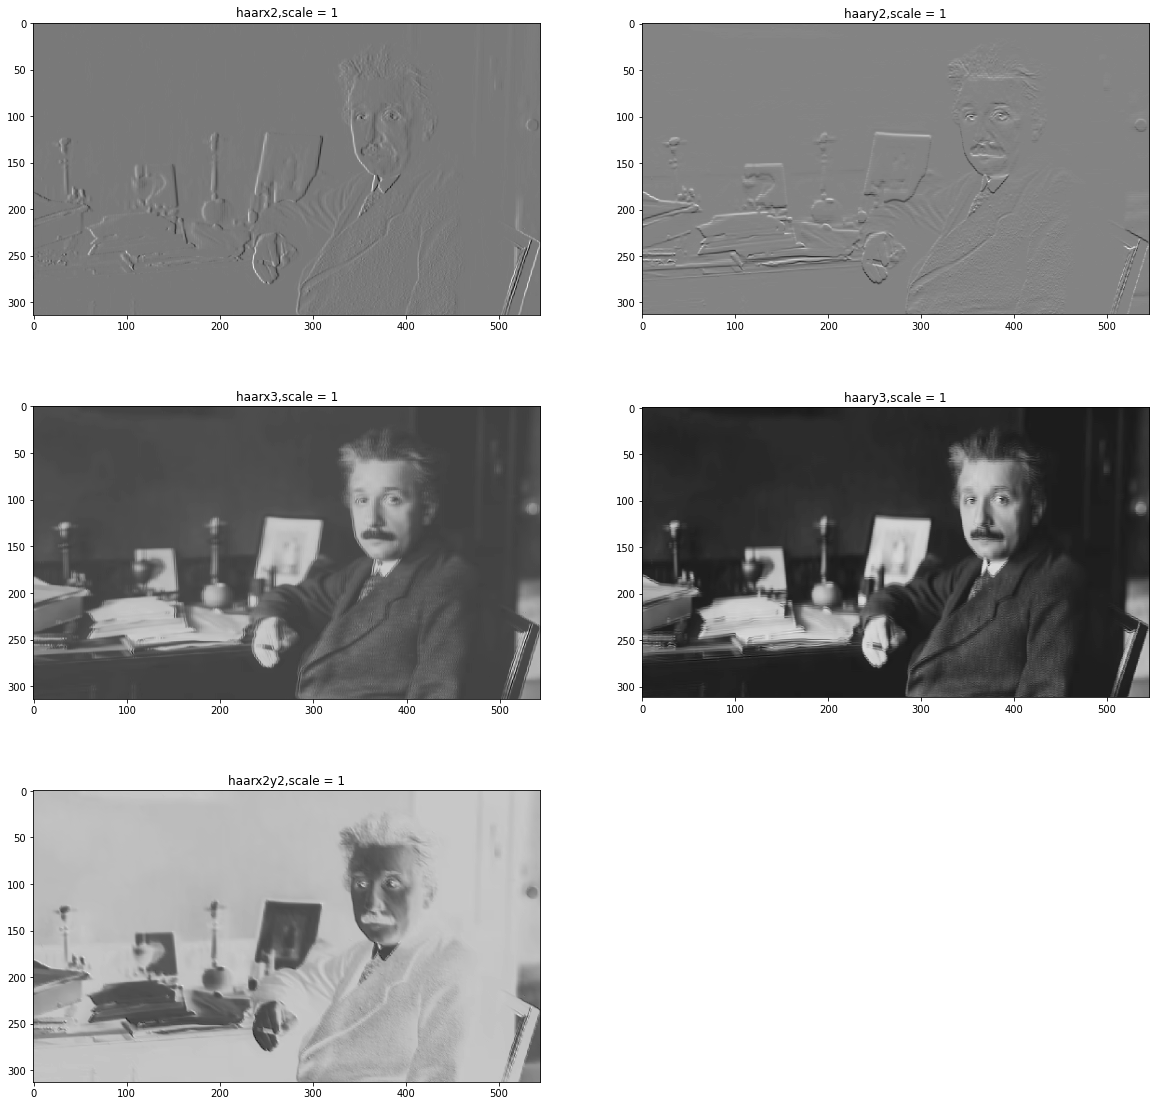

In [116]:
def haar_like(src,scale):
    haarx2 = np.array([[-1,1]])
    haary2 = np.array([[-1],[1]])
    
    haary3 = np.array([[1],[-1],[1]])
    haarx3 = np.array([[1,-1,1]])
    haarx2y2 = np.array([[-1,1],[1,-1]])
    
    haarx2_new = np.zeros([haarx2.shape[0]*scale,haarx2.shape[1]*scale])
    for i in range(0,haarx2.shape[0]*scale):
        for j in range(0,haarx2.shape[0]*scale):
            haarx2_new[i][j] = -1
    for i in range(0,haarx2.shape[0]*scale):
        for j in range(haarx2.shape[0]*scale,haarx2.shape[1]*scale):
            haarx2_new[i][j] = 1
    print('haarx2 kernel is\n',haarx2_new)
    haarx2Img = conv_2d(src,haarx2_new,haarx2_new.shape)

    haary2_new = np.zeros([haary2.shape[0]*scale,haary2.shape[1]*scale])
    for i in range(0,haary2.shape[1]*scale):
        for j in range(0,haary2.shape[1]*scale):
            haary2_new[i][j] = -1
    for i in range(haary2.shape[1]*scale,haary2.shape[0]*scale):
        for j in range(0,haary2.shape[1]*scale):
            haary2_new[i][j] = 1
    print('haary2 kernel is\n',haary2_new)        
    haary2Img = conv_2d(src,haary2_new,haary2_new.shape)

    haarx3_new = np.zeros([haarx3.shape[0]*scale,haarx3.shape[1]*scale])
    for i in range(0,haarx3.shape[0]*scale):
        for j in range(0,haarx3.shape[0]*scale):
            haarx3_new[i][j] = 1
    for i in range(0,haarx3.shape[0]*scale):
        for j in range(haarx3.shape[0]*scale,haarx3.shape[0]*scale*2):
            haarx3_new[i][j] = -1
    for i in range(0,haarx3.shape[0]*scale):
        for j in range(haarx3.shape[0]*scale*2,haarx3.shape[1]*scale):
            haarx3_new[i][j] = 1                
    print('haarx3 kernel is\n',haarx3_new)
    haarx3Img = conv_2d(src,haarx3_new,haarx3_new.shape)
    
    haary3_new = np.zeros([haary3.shape[0]*scale,haary3.shape[1]*scale])
    for i in range(0,haary3.shape[1]*scale):
        for j in range(0,haary3.shape[1]*scale):
            haary3_new[i][j] = 1
    for i in range(haary3.shape[1]*scale,haary3.shape[1]*scale*2):
        for j in range(0,haary3.shape[1]*scale):
            haary3_new[i][j] = -1
    for i in range(haary3.shape[1]*scale*2,haary3.shape[0]*scale):
        for j in range(0,haary3.shape[1]*scale):
            haary3_new[i][j] = 1        
    print('haary3 kernel is\n',haary3_new)        
    haary3Img = conv_2d(src,haary3_new,haary3_new.shape)

    haarx2y2_new = np.zeros([haarx2y2.shape[0]*scale,haarx2y2.shape[1]*scale])
    for i in range(0,int(haarx2y2.shape[0]*scale/2)):
        for j in range(0,int(haarx2y2.shape[1]*scale/2)):
            haarx2y2_new[i][j] = -1
    for i in range(0,int(haarx2y2.shape[0]*scale/2)):
        for j in range(int(haarx2y2.shape[1]*scale/2),haarx2y2.shape[1]*scale):
            haarx3_new[i][j] = 1
    for i in range(int(haarx2y2.shape[0]*scale/2),haarx2y2.shape[0]*scale):
        for j in range(0,int(haarx2y2.shape[1]*scale/2)):
            haarx2y2_new[i][j] = 1      
    for i in range(int(haarx2y2.shape[0]*scale/2),haarx2y2.shape[0]*scale):
        for j in range(int(haarx2y2.shape[1]*scale/2),haarx2y2.shape[1]*scale):
            haarx2y2_new[i][j] = -1              
    print('haarx2y2 kernel is\n',haarx2y2_new)        
    haarx2y2Img = conv_2d(src,haarx2y2_new,haarx2y2_new.shape)          
    
    return haarx2Img,haary2Img,haarx3Img,haary3Img,haarx2y2Img

#==========================================
scale = 1
haarx2Img,haary2Img,haarx3Img,haary3Img,haarx2y2Img = haar_like(srcImg,scale)

plt.figure(figsize=(20,20))
plt.subplot(321)
plt.title('haarx2,scale = 1')
plt.imshow(haarx2Img,cmap="gray")
plt.subplot(322)
plt.title('haary2,scale = 1')
plt.imshow(haary2Img,cmap="gray")
plt.subplot(323)
plt.title('haarx3,scale = 1')
plt.imshow(haarx3Img,cmap="gray")
plt.subplot(324)
plt.title('haary3,scale = 1')
plt.imshow(haary3Img,cmap="gray")
plt.subplot(325)
plt.title('haarx2y2,scale = 1')
plt.imshow(haarx2y2Img,cmap="gray")



## Input scale of the Haar-like masks

In [117]:
scale = input('scale = ')

scale = 5


haarx2 kernel is
 [[-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]
 [-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]
 [-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]
 [-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]
 [-1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]]
haary2 kernel is
 [[-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]
haarx3 kernel is
 [[ 1.  1.  1.  1.  1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.]]
haary3 kernel is
 [[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [-1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1.]
 [-1

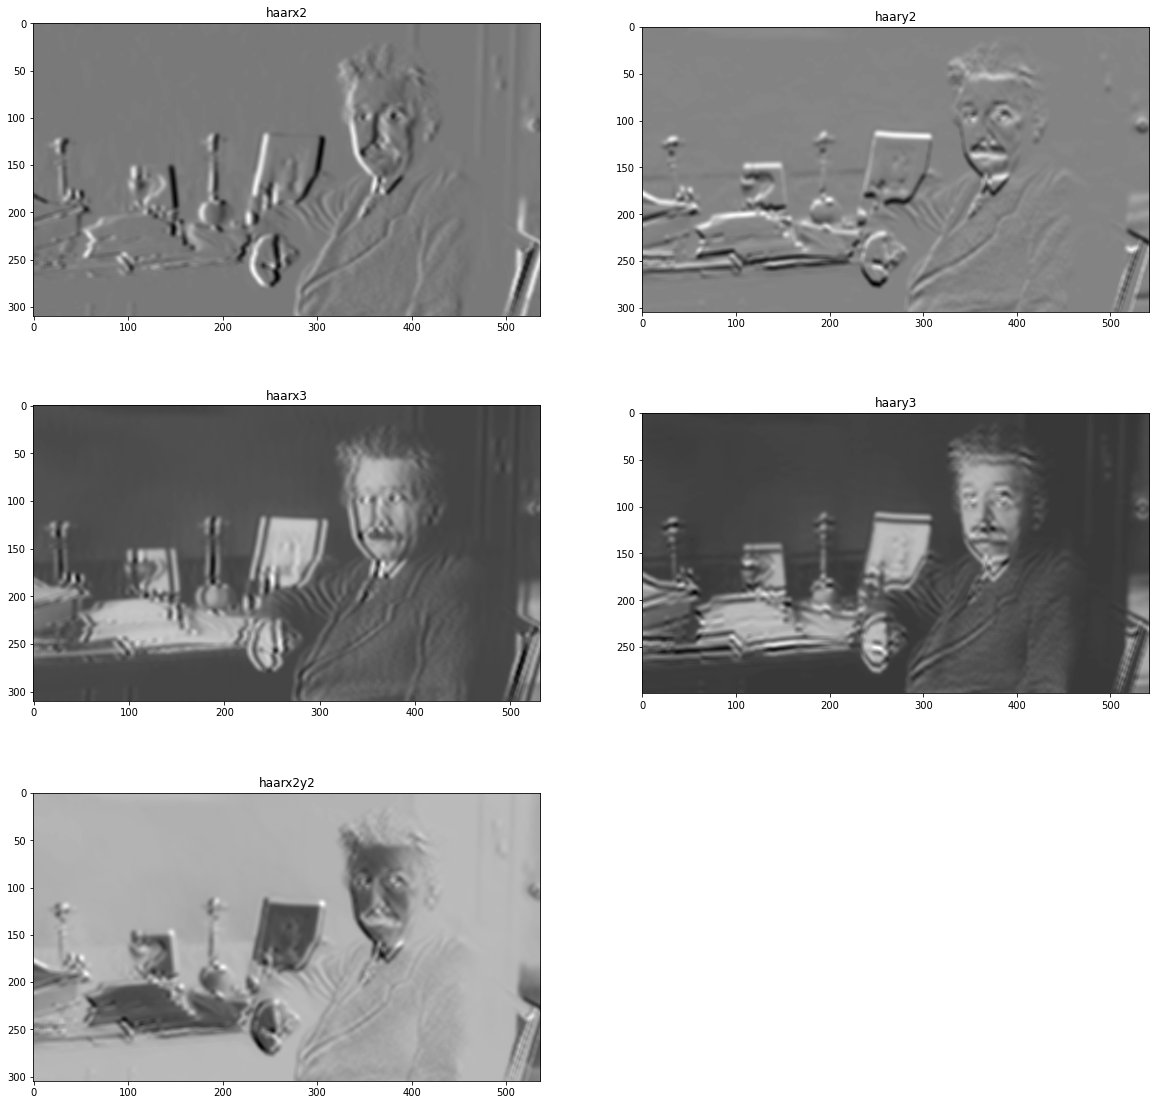

In [120]:
haarx2Img,haary2Img,haarx3Img,haary3Img,haarx2y2Img = haar_like(srcImg,int(scale))

plt.figure(figsize=(20,20))
plt.subplot(321)
plt.title('haarx2')
plt.imshow(haarx2Img,cmap="gray")
plt.subplot(322)
plt.title('haary2')
plt.imshow(haary2Img,cmap="gray")
plt.subplot(323)
plt.title('haarx3')
plt.imshow(haarx3Img,cmap="gray")
plt.subplot(324)
plt.title('haary3')
plt.imshow(haary3Img,cmap="gray")
plt.subplot(325)
plt.title('haarx2y2')
plt.imshow(haarx2y2Img,cmap="gray")

## 3.Write your conclusions on the outputs of each of the kernels, and explain how the size of the kernel influences the outputs.